In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from env import host, user, password
import acquire
import wrangle
import prepare
import cluster



import warnings
warnings.filterwarnings("ignore")

## Bring in Data from CSV

In [2]:
df = pd.read_csv('zillow_df.csv')

In [3]:
df = df.drop(df.columns[0], axis=1)

In [4]:
df.shape

(59930, 17)

In [5]:
pd.set_option('display.max_columns', None)

## Define X and y variables

In [6]:
X = df[['longitude', 'latitude', 'age', 'month',
        'square_footage', 'lot_size', 'house_value',
        'land_value', 'full_value', 'tax_rate',
        'Los_Angeles', 'Orange', 'Ventura', 'bed_bath_ratio', 'bathroomcnt', 'logerror']]
y = df[['logerror']]

## Split and Scale data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 121)

In [8]:
scaler = MinMaxScaler(copy=True, feature_range=(0,1)).fit(X_train)

train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns.values).set_index([X_train.index.values])

test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns.values).set_index([X_test.index.values])

train_scaled.head()

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,Los_Angeles,Orange,Ventura,bed_bath_ratio,bathroomcnt,logerror
34908,0.520456,0.522594,0.401042,0.625,0.565886,0.288830,0.608729,0.211115,0.381740,0.558209,1.0,0.0,0.0,0.250000,0.2,0.824503
59687,0.776761,0.492830,0.312500,1.000,0.351616,0.245636,0.290725,0.188570,0.241751,0.442803,1.0,0.0,0.0,0.357143,0.2,0.574090
2770,0.528157,0.460140,0.244792,0.000,0.632999,0.111914,0.501819,0.803126,0.769668,0.461619,1.0,0.0,0.0,0.100000,0.8,0.590715
27320,0.809053,0.373196,0.276042,0.500,0.177703,0.294366,0.131449,0.166743,0.163993,0.459827,0.0,1.0,0.0,0.142857,0.2,0.587234
24661,0.931276,0.132273,0.156250,0.500,0.266444,0.353493,0.271492,0.283350,0.303035,0.295169,0.0,1.0,0.0,0.142857,0.4,0.590348


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59930 entries, 0 to 59929
Data columns (total 17 columns):
longitude         59930 non-null float64
latitude          59930 non-null float64
age               59930 non-null float64
month             59930 non-null int64
bedroomcnt        59930 non-null float64
bathroomcnt       59930 non-null float64
square_footage    59930 non-null float64
lot_size          59930 non-null float64
house_value       59930 non-null float64
land_value        59930 non-null float64
full_value        59930 non-null float64
tax_rate          59930 non-null float64
Los_Angeles       59930 non-null int64
Orange            59930 non-null int64
Ventura           59930 non-null int64
logerror          59930 non-null float64
bed_bath_ratio    59930 non-null float64
dtypes: float64(13), int64(4)
memory usage: 7.8 MB


## Two Feature/Value

In [10]:
cluster_vars = train_scaled[['bed_bath_ratio','square_footage', 'tax_rate']]
cluster_col_name = 'two_feature_value'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

In [11]:
# optimal_k = cluster.elbow_method(cluster_vars)

In [12]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(5, ['bed_bath_ratio', 'square_footage', 'tax_rate'], 
                                                                                        'two_feature_value', train_scaled, test_scaled)

In [13]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [14]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,Los_Angeles,Orange,Ventura,bed_bath_ratio,bathroomcnt,logerror,two_feature_value,centroid_bed_bath_ratio,centroid_square_footage,centroid_tax_rate
34908,-118476118.0,34061074.0,78.0,6,2898.0,7070.0,375122.0,244299.0,619421.0,0.013315,1,0,0,1.5,2.0,1.775059,2,0.197665,0.635754,0.465998
59687,-117984001.0,34019979.0,61.0,9,1937.0,6048.0,179233.0,218384.0,397617.0,0.011867,1,0,0,2.0,2.0,-0.116786,4,0.229430,0.387973,0.442911
2770,-118461331.0,33974843.0,48.0,1,3199.0,2884.0,309266.0,924804.0,1234070.0,0.012103,1,0,0,0.8,5.0,0.008819,2,0.197665,0.635754,0.465998
27320,-117922000.0,33854800.0,54.0,5,1157.0,7201.0,81120.0,193295.0,274415.0,0.012080,0,1,0,1.0,2.0,-0.017483,1,0.183331,0.205145,0.450664
24661,-117687326.0,33522157.0,31.0,5,1555.0,8600.0,167386.0,327332.0,494718.0,0.010014,0,1,0,1.0,3.0,0.006042,1,0.183331,0.205145,0.450664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28148,-117983453.0,33826630.0,48.0,5,2021.0,6000.0,130735.0,160608.0,291343.0,0.011922,0,1,0,2.0,2.0,0.016438,4,0.229430,0.387973,0.442911
58975,-118316590.0,34126515.0,56.0,9,1745.0,7144.0,58795.0,43877.0,102672.0,0.014314,1,0,0,1.5,2.0,-0.297158,3,0.264845,0.281669,0.779487
56584,-118654182.0,34191203.0,57.0,9,1250.0,7685.0,92245.0,354818.0,447063.0,0.014742,1,0,0,1.5,2.0,0.077938,3,0.264845,0.281669,0.779487
37333,-118433101.0,33989543.0,65.0,6,760.0,2496.0,124025.0,496108.0,620133.0,0.011918,1,0,0,2.0,1.0,-0.024210,0,0.424366,0.188750,0.494409


## Feature/Age/Value

In [15]:
cluster_vars = train_scaled[['lot_size', 'age', 'full_value']]
cluster_col_name = 'feature_age_value'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

In [16]:
# optimal_k = cluster.elbow_method(cluster_vars)

In [17]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(5, ['lot_size', 'age', 'full_value'], 
                                                                                        'feature_age_value', train_scaled, test_scaled)

In [18]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [19]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,Los_Angeles,Orange,Ventura,bed_bath_ratio,bathroomcnt,logerror,two_feature_value,centroid_bed_bath_ratio,centroid_square_footage,centroid_tax_rate,feature_age_value,centroid_lot_size,centroid_age,centroid_full_value
34908,-118476118.0,34061074.0,78.0,6,2898.0,7070.0,375122.0,244299.0,619421.0,0.013315,1,0,0,1.5,2.0,1.775059,2,0.197665,0.635754,0.465998,3,0.283276,0.347421,0.307623
59687,-117984001.0,34019979.0,61.0,9,1937.0,6048.0,179233.0,218384.0,397617.0,0.011867,1,0,0,2.0,2.0,-0.116786,4,0.229430,0.387973,0.442911,3,0.283276,0.347421,0.307623
2770,-118461331.0,33974843.0,48.0,1,3199.0,2884.0,309266.0,924804.0,1234070.0,0.012103,1,0,0,0.8,5.0,0.008819,2,0.197665,0.635754,0.465998,2,0.309452,0.199938,0.590778
27320,-117922000.0,33854800.0,54.0,5,1157.0,7201.0,81120.0,193295.0,274415.0,0.012080,0,1,0,1.0,2.0,-0.017483,1,0.183331,0.205145,0.450664,0,0.267801,0.337996,0.100313
24661,-117687326.0,33522157.0,31.0,5,1555.0,8600.0,167386.0,327332.0,494718.0,0.010014,0,1,0,1.0,3.0,0.006042,1,0.183331,0.205145,0.450664,4,0.246705,0.143014,0.235960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28148,-117983453.0,33826630.0,48.0,5,2021.0,6000.0,130735.0,160608.0,291343.0,0.011922,0,1,0,2.0,2.0,0.016438,4,0.229430,0.387973,0.442911,4,0.246705,0.143014,0.235960
58975,-118316590.0,34126515.0,56.0,9,1745.0,7144.0,58795.0,43877.0,102672.0,0.014314,1,0,0,1.5,2.0,-0.297158,3,0.264845,0.281669,0.779487,0,0.267801,0.337996,0.100313
56584,-118654182.0,34191203.0,57.0,9,1250.0,7685.0,92245.0,354818.0,447063.0,0.014742,1,0,0,1.5,2.0,0.077938,3,0.264845,0.281669,0.779487,3,0.283276,0.347421,0.307623
37333,-118433101.0,33989543.0,65.0,6,760.0,2496.0,124025.0,496108.0,620133.0,0.011918,1,0,0,2.0,1.0,-0.024210,0,0.424366,0.188750,0.494409,3,0.283276,0.347421,0.307623


## Month/Value/Feature

In [20]:
cluster_vars = train_scaled[['month', 'house_value', 'bathroomcnt']]
cluster_col_name = 'month_value_feature'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

In [21]:
# optimal_k = cluster.elbow_method(cluster_vars)

In [22]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(5, ['month', 'house_value', 'bathroomcnt'], 
                                                                                        'month_value_feature', train_scaled, test_scaled)

In [23]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [24]:
X_train

,longitude,latitude,age,month,square_footage,lot_size,house_value,land_value,full_value,tax_rate,Los_Angeles,Orange,Ventura,bed_bath_ratio,bathroomcnt,logerror,two_feature_value,centroid_bed_bath_ratio,centroid_square_footage,centroid_tax_rate,feature_age_value,centroid_lot_size,centroid_age,centroid_full_value,month_value_feature,centroid_month,centroid_house_value,centroid_bathroomcnt
34908,-118476118.0,34061074.0,78.0,6,2898.0,7070.0,375122.0,244299.0,619421.0,0.013315,1,0,0,1.5,2.0,1.775059,2,0.197665,0.635754,0.465998,3,0.283276,0.347421,0.307623,2,0.703730,0.494296,0.429639
59687,-117984001.0,34019979.0,61.0,9,1937.0,6048.0,179233.0,218384.0,397617.0,0.011867,1,0,0,2.0,2.0,-0.116786,4,0.229430,0.387973,0.442911,3,0.283276,0.347421,0.307623,4,0.855346,0.186723,0.187677
2770,-118461331.0,33974843.0,48.0,1,3199.0,2884.0,309266.0,924804.0,1234070.0,0.012103,1,0,0,0.8,5.0,0.008819,2,0.197665,0.635754,0.465998,2,0.309452,0.199938,0.590778,1,0.213099,0.460381,0.417935
27320,-117922000.0,33854800.0,54.0,5,1157.0,7201.0,81120.0,193295.0,274415.0,0.012080,0,1,0,1.0,2.0,-0.017483,1,0.183331,0.205145,0.450664,0,0.267801,0.337996,0.100313,0,0.509818,0.181957,0.181498
24661,-117687326.0,33522157.0,31.0,5,1555.0,8600.0,167386.0,327332.0,494718.0,0.010014,0,1,0,1.0,3.0,0.006042,1,0.183331,0.205145,0.450664,4,0.246705,0.143014,0.235960,0,0.509818,0.181957,0.181498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28148,-117983453.0,33826630.0,48.0,5,2021.0,6000.0,130735.0,160608.0,291343.0,0.011922,0,1,0,2.0,2.0,0.016438,4,0.229430,0.387973,0.442911,4,0.246705,0.143014,0.235960,0,0.509818,0.181957,0.181498
58975,-118316590.0,34126515.0,56.0,9,1745.0,7144.0,58795.0,43877.0,102672.0,0.014314,1,0,0,1.5,2.0,-0.297158,3,0.264845,0.281669,0.779487,0,0.267801,0.337996,0.100313,4,0.855346,0.186723,0.187677
56584,-118654182.0,34191203.0,57.0,9,1250.0,7685.0,92245.0,354818.0,447063.0,0.014742,1,0,0,1.5,2.0,0.077938,3,0.264845,0.281669,0.779487,3,0.283276,0.347421,0.307623,4,0.855346,0.186723,0.187677
37333,-118433101.0,33989543.0,65.0,6,760.0,2496.0,124025.0,496108.0,620133.0,0.011918,1,0,0,2.0,1.0,-0.024210,0,0.424366,0.188750,0.494409,3,0.283276,0.347421,0.307623,0,0.509818,0.181957,0.181498


## House/Month/Ratio

In [25]:
cluster_vars = train_scaled[['month', 'house_value', 'bed_bath_ratio']]
cluster_col_name = 'house_month_ratio'
centroid_col_names = ['centroid_' + i for i in cluster_vars]

In [26]:
kmeans, train_clusters, test_clusters, cluster_counts = cluster.get_clusters_and_counts(5, ['month', 'house_value', 'bed_bath_ratio'], 
                                                                                        'house_month_ratio', train_scaled, test_scaled)

In [27]:
X_train, train_scaled, X_test, test_scaled, centroids = cluster.append_clusters_and_centroids(
                                X_train, train_scaled, train_clusters, 
                                X_test, test_scaled, test_clusters, 
                                cluster_col_name, centroid_col_names, kmeans)

In [28]:
cluster.test_sig(X_train.two_feature_value, X_train)

,ttest,pval,stat_sig
0,4.713251,0.000003,True
1,0.617794,0.536725,False
2,-3.192175,0.001415,True
3,0.458593,0.646543,False
4,-1.686226,0.091792,False


In [29]:
cluster.test_sig(X_train.feature_age_value, X_train)

,ttest,pval,stat_sig
0,-3.906421,0.000094,True
1,1.353809,0.175863,False
2,3.854673,0.000116,True
3,-3.700716,0.000216,True
4,1.478603,0.139340,False


In [30]:
cluster.test_sig(X_train.month_value_feature, X_train)

,ttest,pval,stat_sig
0,3.040219,0.002374,True
1,-0.113706,0.909473,False
2,-1.091209,0.275237,False
3,-2.577245,0.009971,True
4,1.165017,0.244044,False


In [31]:
cluster.test_sig(X_train.house_month_ratio, X_train)

,ttest,pval,stat_sig
0,1.670926,0.094803,False
1,0.995699,0.319419,False
2,-2.014995,0.043980,True
3,-2.252849,0.024285,True
4,1.766170,0.077399,False


In [32]:
X_train.house_month_ratio.value_counts()

0    13301
3    10806
2     9618
4     4658
1     3568
Name: house_month_ratio, dtype: int64

In [33]:
X_train.month_value_feature.value_counts()

0    12320
4    10139
3     8793
2     6015
1     4684
Name: month_value_feature, dtype: int64

In [34]:
X_train.shape

(41951, 32)

In [35]:
df.shape

(59930, 17)

In [36]:
# plt.figure(figsize=(13, 7))
# for cluster, subset in train_scaled.groupby('feature_age_value'):
#     plt.scatter(subset.age, subset.lot_size, label=cluster)
# centroids = pd.DataFrame(X_train.centroid_lot_size, 
#                          X_train.centroid_age, 
#                          X_train.centroid_full_value)
# centroids.plot.scatter(x='age', y='full_value', ax=plt.gca(), alpha=.15, s=5000, c='black')
# plt.legend()

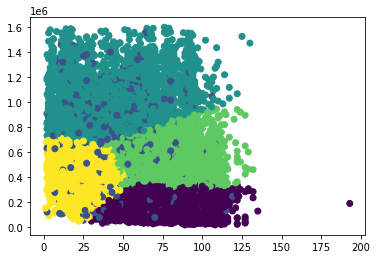

In [39]:
plt.scatter(X_train.age, X_train.full_value, c=X_train.feature_age_value)